In [2]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import mannwhitneyu

In [3]:
data = pd.read_csv('data/result.csv')
data2 = pd.read_csv('data/result2.csv')

data = data.drop(['Unnamed: 0'], axis=1)
data2 = data2.drop(['Unnamed: 0'], axis=1)

data = data.drop(data.loc[data['Category'] == 'others'].index)
data2 = data2.drop(data2.loc[data2['Category'] == 'others'].index)

data

,index,Category,Language,Lib,Year,Month,NewCommers
0,0,data-science,python,NumPy,2009,1,0
1,1,data-science,python,NumPy,2009,2,0
2,2,data-science,python,NumPy,2009,3,0
3,3,data-science,python,NumPy,2009,4,0
4,4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...,...
9715,4531,data-science,r,beepr,2017,8,1
9716,4532,data-science,r,beepr,2017,9,1
9717,4533,data-science,r,beepr,2017,10,0
9718,4534,data-science,r,beepr,2017,11,0


In [4]:
data2

,index,Category,Language,Lib,Newer,Repeat
0,0,data-science,python,NumPy,563132.0,1
1,1,data-science,python,NumPy,190280.0,1
2,2,data-science,python,NumPy,490473.0,1
3,3,data-science,python,NumPy,565888.0,1
4,4,data-science,python,NumPy,566621.0,1
...,...,...,...,...,...,...
230450,48928,data-science,r,beepr,6354827.0,1
230451,48929,data-science,r,beepr,1641862.0,1
230452,48930,data-science,r,beepr,6619250.0,1
230453,48931,data-science,r,beepr,8501772.0,1


In [5]:
dataPython = data.loc[data['Language'] == 'python', 'NewCommers'].sum()
dataR = data.loc[data['Language'] == 'r', 'NewCommers'].sum()

In [6]:
dataAllPython = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'python')]
dataAllR = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'r')]

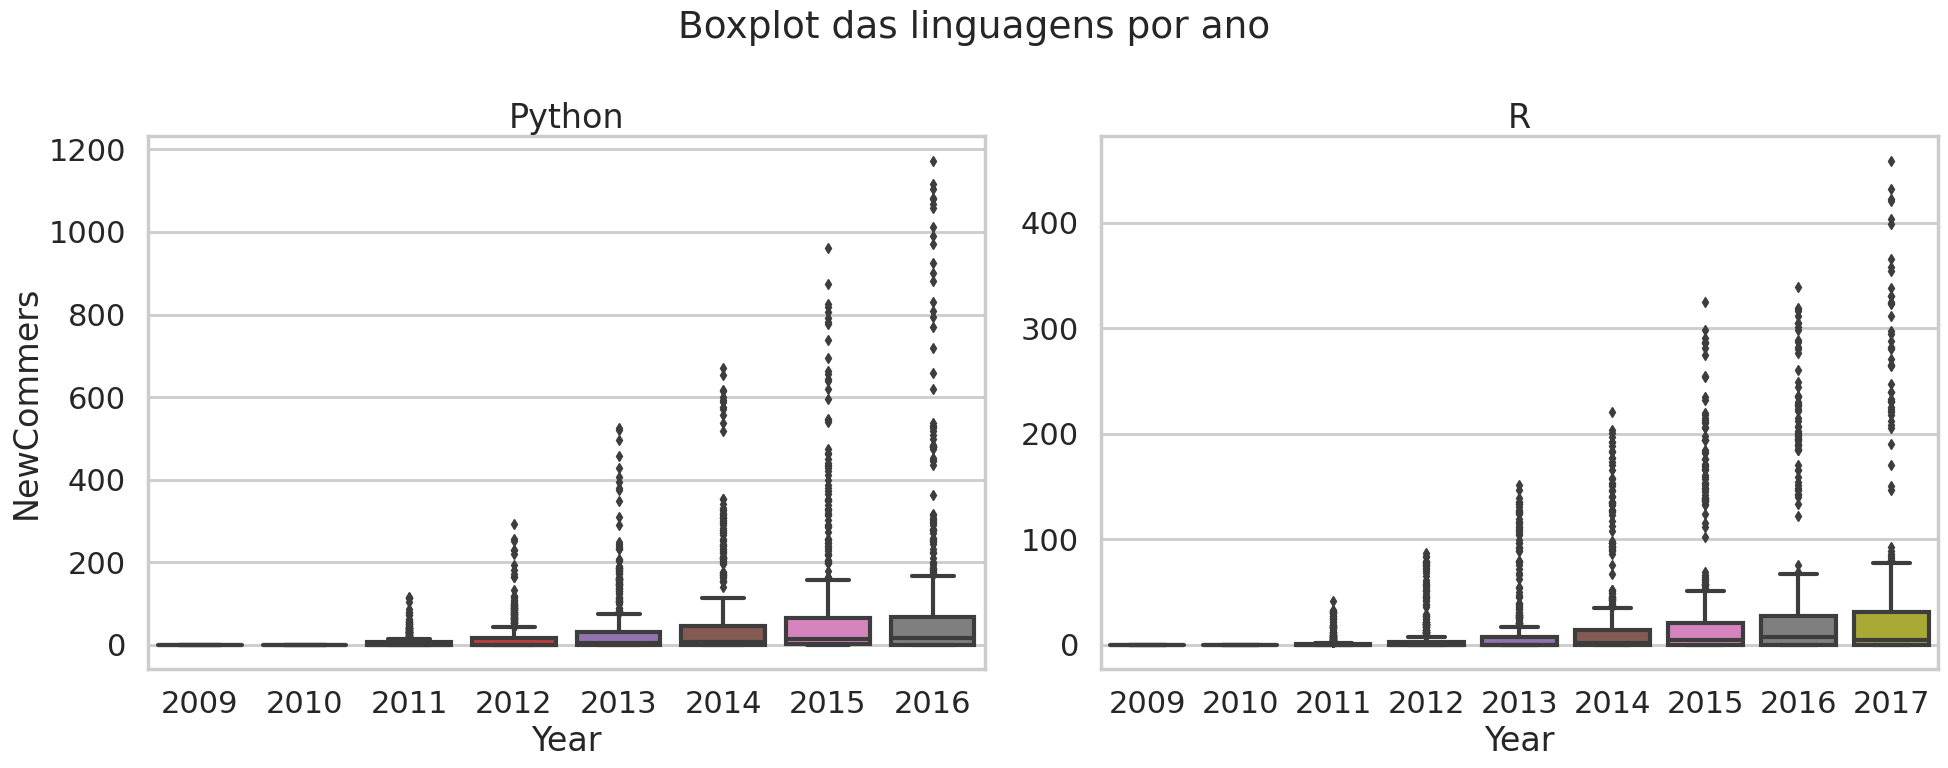

Hipotese nula rejeitada...
p:  4.231328838629008e-13
d:  0.24829889598040317 
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



In [105]:
sns.reset_orig()

sns.set_style("whitegrid")
sns.set_context("poster")

fig, axs = plt.subplots(1, 2)
fig.suptitle("Boxplot das linguagens por ano", fontsize=27)
fig.set_figwidth(20)
fig.set_figheight(8)

axs[0].set_title('Python')
axs[1].set_title('R')
sns.boxplot(data=dataAllPython, y='NewCommers', x='Year', ax=axs[0])
sns.boxplot(data=dataAllR, y='NewCommers', x='Year', ax=axs[1])

axs[1].set_ylabel('')

fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

def cohend(d1, d2):
	n1, n2 = len(d1), len(d2)
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	u1, u2 = np.mean(d1), np.mean(d2)
	return (u1 - u2) / s


if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')

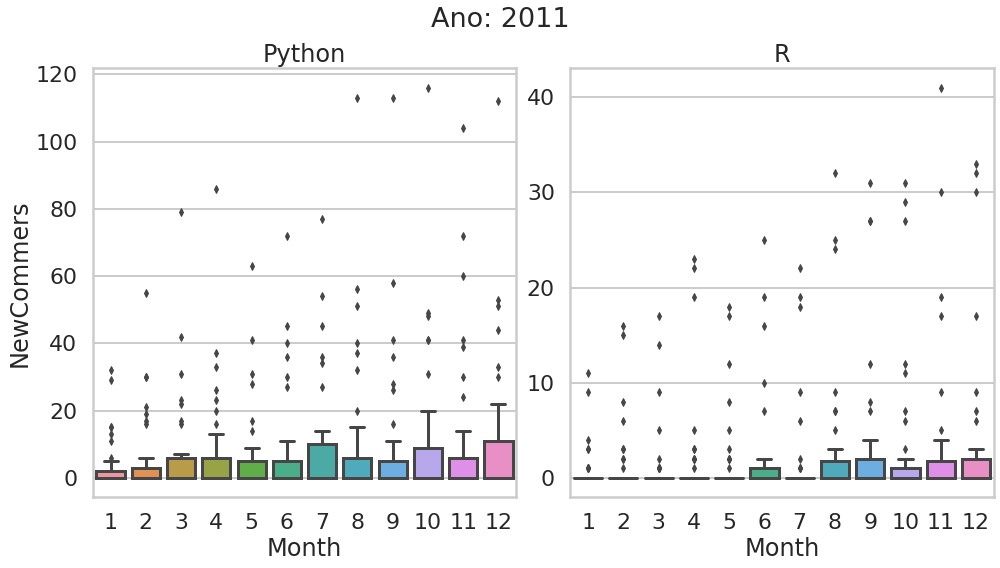

Hipotese nula rejeitada para o ano de 2011...
p: 4.231328838629008e-13
d: 0.4236891938509868
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



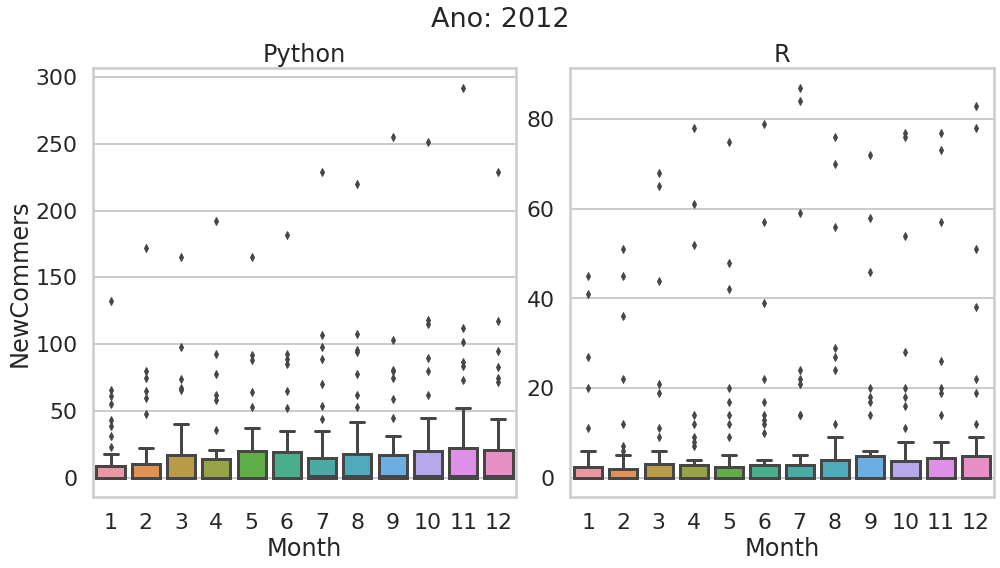

Hipotese nula rejeitada para o ano de 2012...
p: 4.231328838629008e-13
d: 0.39636632055501714
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



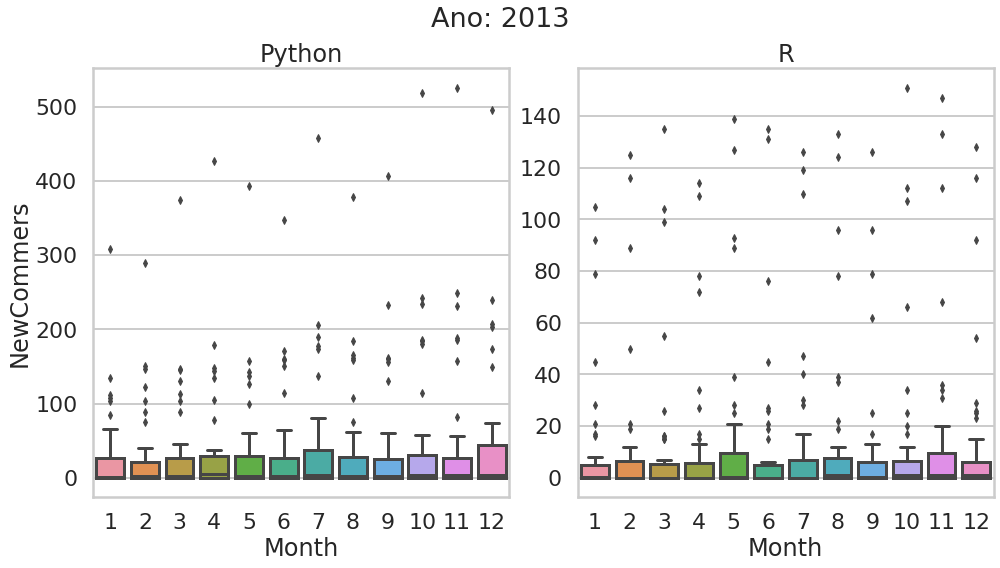

Hipotese nula rejeitada para o ano de 2013...
p: 4.231328838629008e-13
d: 0.4100675126227774
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



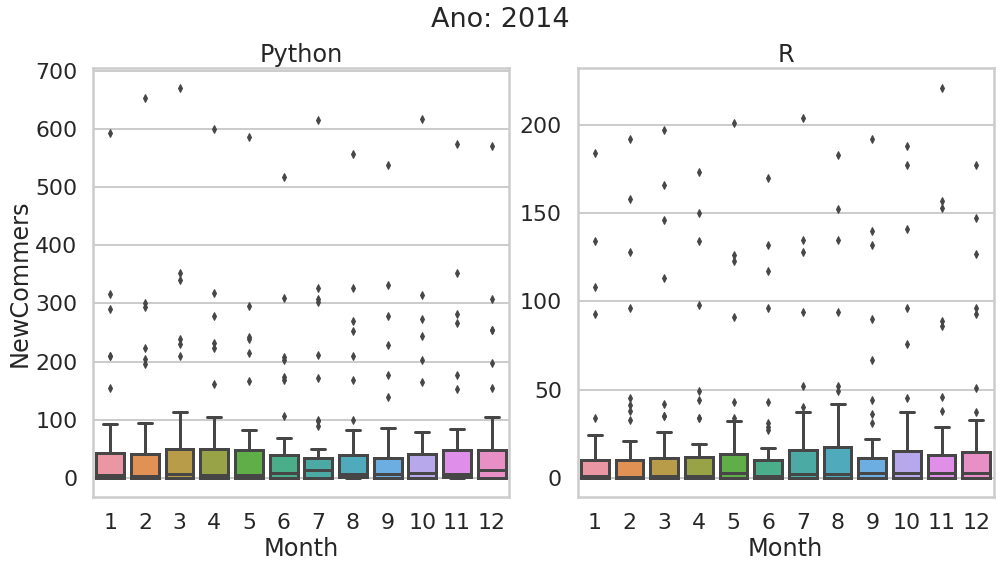

Hipotese nula rejeitada para o ano de 2014...
p: 4.231328838629008e-13
d: 0.4239858596333384
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



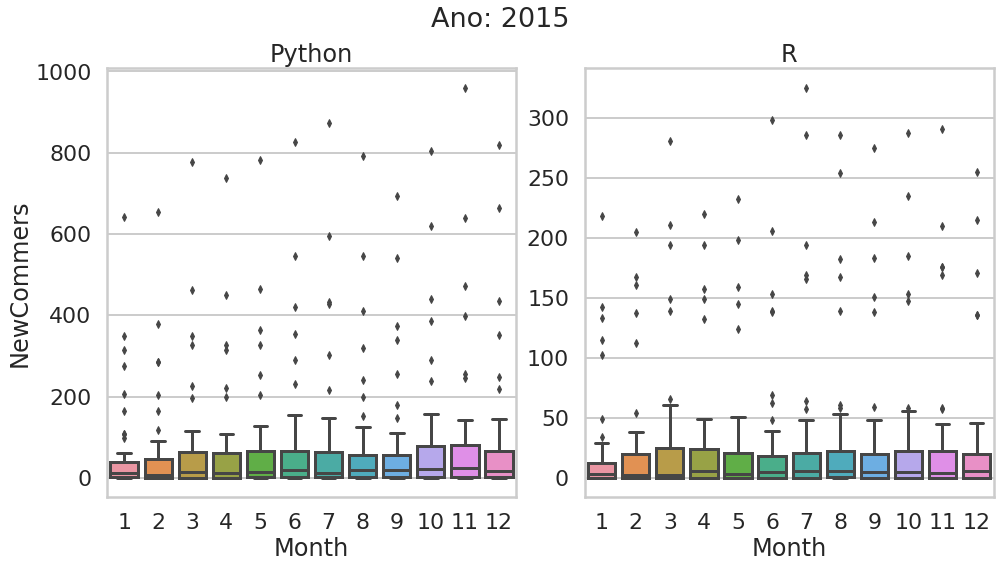

Hipotese nula rejeitada para o ano de 2015...
p: 4.231328838629008e-13
d: 0.4102676973953074
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



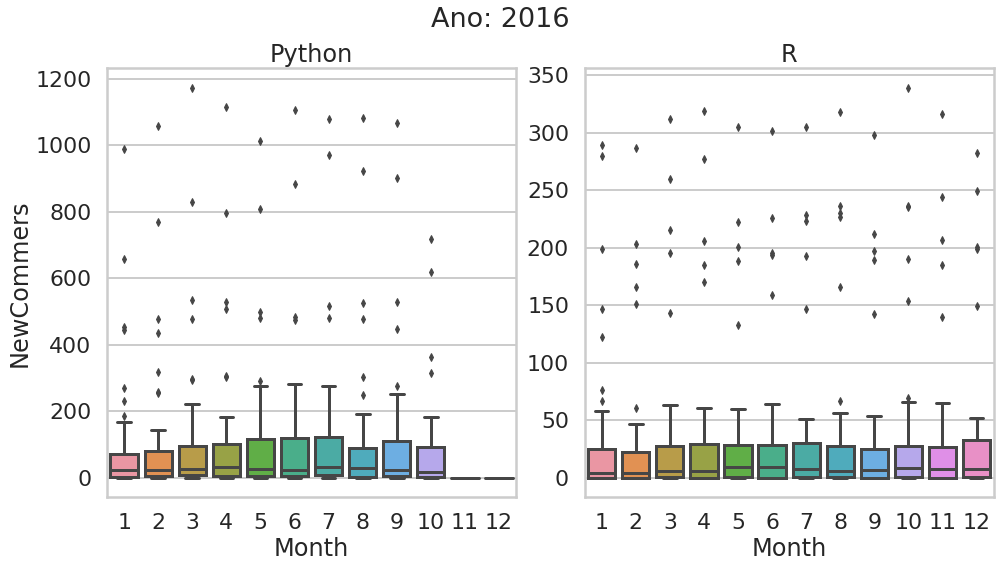

Hipotese nula rejeitada para o ano de 2016...
p: 4.231328838629008e-13
d: 0.3762556975931186
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



In [8]:
# anoNot = set(dataAllR['Year'].unique().tolist()) ^ set(dataAllPython['Year'].unique().tolist())
anoNot = [2017, 2009, 2010]

for ano in data['Year'].unique().tolist():
    
    if ano not in anoNot:
        
        fig, axs = plt.subplots(1, 2)
        fig.suptitle("Ano: " + str(ano), fontsize=27)
        fig.set_figwidth(14)
        fig.set_figheight(8)
      
        dataYearPython = dataAllPython.loc[dataAllPython['Year'] == ano]
        dataYearR = dataAllR.loc[dataAllR['Year'] == ano]
        
        axs[0].set_title('Python')
        axs[1].set_title('R')
        sns.boxplot(data=dataYearPython, y='NewCommers', x='Month', ax=axs[0])
        sns.boxplot(data=dataYearR, y='NewCommers', x='Month', ax=axs[1])

        axs[1].set_ylabel('')

        fig.tight_layout()
        plt.show()

        U1, p = mannwhitneyu(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

        if p < 0.05:
            print(f'Hipotese nula rejeitada para o ano de {ano}...\np: {p}')

            # clifdelta**
            d = cohend(dataYearPython['NewCommers'].values.tolist(), dataYearR['NewCommers'].values.tolist())

            text = ''
            if d < 0.20:
                    text = 'trivial'
            elif d >= 0.20 and d < 0.50:
                text = 'pouco significativo'
            elif d >= 0.50 and d < 0.80:
                text = 'medio significativo'
            elif d >= 0.80:
                text = 'bastante significativo'

            print(f'd: {d}\nPelo valor de "d", temos que a diferença dos conjuntos é {text}', end='\n\n')

        else:
            print(f'Hipotese nula não rejeitada para o ano de {ano}...\np: {p}!\n\n')

In [9]:
dataPython2 = data2.loc[data2['Language'] == 'python']
dataR2 = data2.loc[data2['Language'] == 'r']

In [10]:
values = []
values2 = []

for lib in dataPython2['Lib'].unique().tolist():
    quantidadeNovatos = len(dataPython2.loc[dataPython2['Lib'] == lib, 'Newer'].unique())
    quantidadePerguntas = dataPython2.loc[dataPython2['Lib'] == lib, 'Repeat'].sum()

    values.append(['python', lib, quantidadeNovatos, quantidadePerguntas])

for lib in dataR2['Lib'].unique().tolist():
    quantidadeNovatos = len(dataR2.loc[dataR2['Lib'] == lib, 'Newer'].unique())
    quantidadePerguntas = dataR2.loc[dataR2['Lib'] == lib, 'Repeat'].sum()

    values.append(['r', lib, quantidadeNovatos, quantidadePerguntas])

valuesDF = pd.DataFrame(values, columns=['Language', 'Lib', 'NewCommers', 'Repeat'])


In [11]:
valuesDF

,Language,Lib,NewCommers,Repeat
0,python,NumPy,19961,35292
1,python,Keras,259,355
2,python,Pandas,9790,20638
3,python,TensorFlow,985,1443
4,python,Matplotlib,10204,15906
...,...,...,...,...
78,r,fst,429,469
79,r,devtools,1117,1419
80,r,pacman,51,68
81,r,plumber,27,30


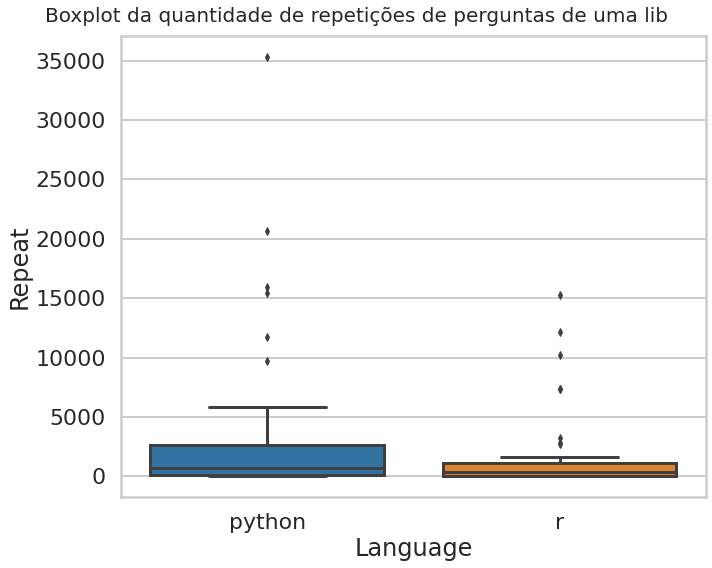

Hipotese nula não rejeitada...
p: 0.18356483540185897!




In [13]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.boxplot(data=valuesDF, y='Repeat', x='Language')
fig.suptitle("Boxplot da quantidade de repetições de perguntas de uma lib", fontsize=20)
fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(valuesDF.loc[valuesDF['Language'] == 'python', 'Repeat'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'Repeat'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(valuesDF.loc[valuesDF['Language'] == 'python', 'Repeat'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'Repeat'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
else:
    print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

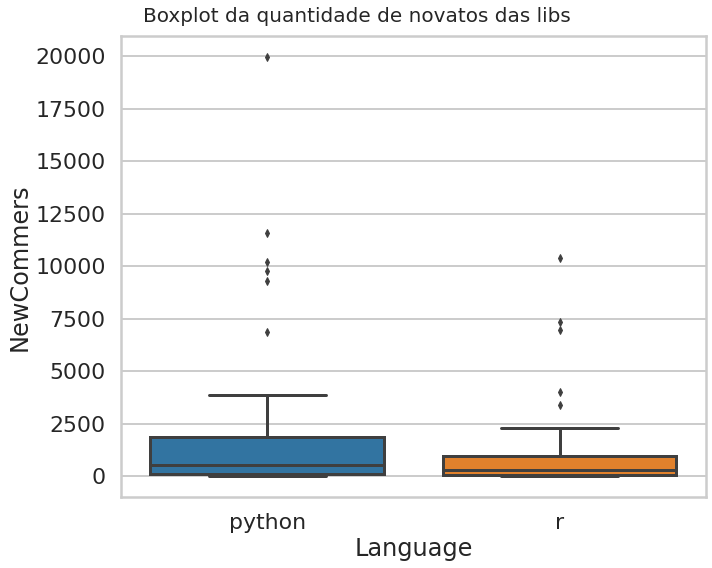

Hipotese nula não rejeitada...
p: 0.19586203754228193!




In [14]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.boxplot(data=valuesDF, y='NewCommers', x='Language')
fig.suptitle("Boxplot da quantidade de novatos das libs", fontsize=20)
fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(valuesDF.loc[valuesDF['Language'] == 'python', 'NewCommers'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'NewCommers'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(valuesDF.loc[valuesDF['Language'] == 'python', 'NewCommers'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
else:
    print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

In [69]:
data

,index,Category,Language,Lib,Year,Month,NewCommers
0,0,data-science,python,NumPy,2009,1,0
1,1,data-science,python,NumPy,2009,2,0
2,2,data-science,python,NumPy,2009,3,0
3,3,data-science,python,NumPy,2009,4,0
4,4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...,...
9715,4531,data-science,r,beepr,2017,8,1
9716,4532,data-science,r,beepr,2017,9,1
9717,4533,data-science,r,beepr,2017,10,0
9718,4534,data-science,r,beepr,2017,11,0


In [91]:
pythonRepeat = []
Rrepeat = []

for a in data.loc[(data['Language'] == 'python'), 'Lib'].unique().tolist():
    pythonRepeat.append([data.loc[data['Lib'] == a, 'NewCommers'].sum(), a])

for a in data.loc[(data['Language'] == 'r'), 'Lib'].unique().tolist():
    Rrepeat.append([data.loc[data['Lib'] == a, 'NewCommers'].sum(), a])

In [92]:
sorted(pythonRepeat, reverse=True), sorted(Rrepeat, reverse=True)

([[35292, 'NumPy'],
  [20638, 'Pandas'],
  [15906, 'Matplotlib'],
  [15457, 'Requests'],
  [11767, 'Pattern'],
  [9708, 'SciPy'],
  [5839, 'SQLAlchemy'],
  [5541, 'Selenium'],
  [4219, 'ScraPy'],
  [3818, 'OpenCV'],
  [2621, 'NLTK'],
  [2037, 'SciKit-Learn'],
  [1443, 'TensorFlow'],
  [1380, 'Annoy'],
  [1228, 'Dlib'],
  [1061, 'PyTest'],
  [1024, 'Theano'],
  [958, 'Beautiful Soup'],
  [885, 'Pillow'],
  [740, 'Seaborn'],
  [682, 'Statsmodels'],
  [682, 'StatsModels'],
  [656, 'Bokeh'],
  [355, 'Keras'],
  [345, 'Gensim'],
  [328, 'GGplot'],
  [251, 'Plotly'],
  [207, 'PyQtgraph'],
  [148, 'Dask'],
  [137, 'pydot'],
  [110, 'XGBoost'],
  [69, 'PyUnit'],
  [61, 'Mahotas'],
  [52, 'folium'],
  [27, 'VisPy'],
  [25, 'TPOT'],
  [22, 'SimpleITK'],
  [9, 'Prophet'],
  [5, 'Altair'],
  [2, 'mlpack'],
  [2, 'Bqplot']],
 [[15310, 'sf'],
  [12153, 'ggplot2'],
  [10213, 'rio'],
  [7339, 'data.table'],
  [7323, 'dplyr'],
  [3204, 'zoo'],
  [2769, 'scales'],
  [2713, 'xml'],
  [1605, 'tmap'],
  [1

In [96]:
data

,index,Category,Language,Lib,Year,Month,NewCommers
0,0,data-science,python,NumPy,2009,1,0
1,1,data-science,python,NumPy,2009,2,0
2,2,data-science,python,NumPy,2009,3,0
3,3,data-science,python,NumPy,2009,4,0
4,4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...,...
9715,4531,data-science,r,beepr,2017,8,1
9716,4532,data-science,r,beepr,2017,9,1
9717,4533,data-science,r,beepr,2017,10,0
9718,4534,data-science,r,beepr,2017,11,0


In [97]:
dataP = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])
dataR = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])

dataP['NewCommers'] = data.loc[(data['Lib'] == 'NumPy'), 'NewCommers']
dataP['Lib'] = 'Numpy'
dataP['Language'] = 'Python'

dataR['NewCommers'] = data.loc[(data['Lib'] == 'sf'), 'NewCommers']
dataR['Lib'] = 'sf'
dataR['Language'] = 'r'

dataALL = dataP.reset_index().merge(dataR.reset_index(), how='outer')

In [98]:
dataALL

,index,Language,Lib,NewCommers
0,0,Python,Numpy,0
1,1,Python,Numpy,0
2,2,Python,Numpy,0
3,3,Python,Numpy,0
4,4,Python,Numpy,0
...,...,...,...,...
199,8095,r,sf,432
200,8096,r,sf,331
201,8097,r,sf,0
202,8098,r,sf,0


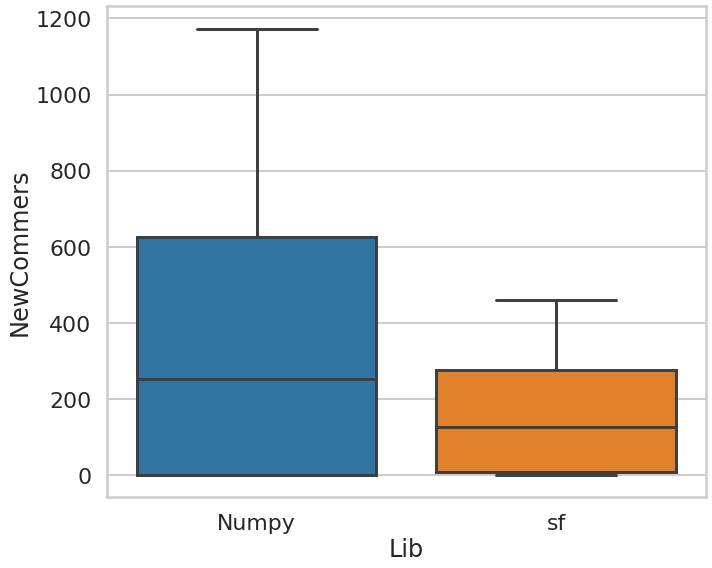

Hipotese nula rejeitada...
p:  0.0003116264413221744
d:  0.8504208131349377 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



In [104]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dataALL, y='NewCommers', x='Lib')
# fig.suptitle("Boxplot da quantidade de repetições de perguntas de uma lib", fontsize=20)
fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(dataALL.loc[(dataALL['Lib'] == 'Numpy'), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == 'sf'), 'NewCommers'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(dataALL.loc[(dataALL['Lib'] == 'Numpy'), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == 'sf'), 'NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
else:
    print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

In [ ]:
# fazer a comparação em conjunto para as 10 libs mais famosas entre as linguagens, e usar o scipy.stats.kruskal caso rejeite a hipotese nula,
# par a par para verificar onde que ocorre a distoância.